## Data wrangling, cleaning, and analyzing

In [1]:
import numpy as np
import pandas as pd

#format the Products dataset

from google.colab import files
upload = files.upload()
products_df = pd.read_excel('Products.xlsx')

products_df['rating_num'] = products_df['rating_num'].apply(lambda x:eval(str(x).replace(' ratings','').replace(' rating','').replace(',','')))
products_df['price($)'] = products_df['price($)'].apply(lambda x:eval(str(x).replace('$','')))
products_df['watt'] = products_df['watt'].apply(lambda x:str(x).split(' ')[0].strip().replace('nan','0'))
products_df = products_df.drop_duplicates(subset=['product_ID'],keep='last').reset_index()
products_df

Saving Products.xlsx to Products.xlsx


,index,product_ID,name,product_rating,rating_num,price($),is_prime,description,shape,brand,hair_type,material,color,product_benefit,power_source,special_feature,watt
0,2,B08P48L2JJ,MEGAWISE Pro Ceramic Ionic Hair Straightener B...,4.4,1625,2.50,0,LOOK BETTER IN MINUTES--Updated 2023 brush. u...,Straight,MEGAWISE,All,Ceramic,,Straightening,,,
1,4,B0BTDKTFX1,"Nicebay Hair Straightener Brush, Negative Ion ...",4.6,749,119.98,0,IONIC GENERATOR & PTC HEATING TECHNOLOGYIonic...,,Nicebay,,,Black&yellow,,Corded Electric,,60
2,5,B0751KYGC1,Revlon Hair Straightening and Styling Brush | ...,4.3,5360,31.98,0,SMOOTH AND DETANGLE: Multi-Dimensional bristl...,,REVLON,,Ceramic,Black,,Corded Electric,,50
3,6,B0BBLZ9XJT,2023 Updated MEGAWISE Hair Straightener Cerami...,4.4,111,2.10,0,LOOK BETTER IN MINUTES--Updated 2023 brush. u...,,MEGAWISE,,Ceramic,Pink Golden,,Corded Electric,,65
4,7,B08HWSF23N,MEGAWISE Pro Ceramic Ionic Hair Straightener B...,4.3,1898,2.90,0,LOOK BETTER IN MINUTES--Updated 2023 brush. u...,,MEGAWISE,,Ceramic,Black,,Corded Electric,,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,304,B07GPQKMRM,MIRACOMB Hair Curler Straightening Brush - Cer...,4.3,1529,47.49,0,MULTIFUNCTIONAL ANTI-SCALD HAIR STYLER C Top ...,Round,MIRACOMB,"Straighten,Curl",Ceramic,,,,,
279,305,B06XGXP9RP,Enhanced Hair Straightener Heat Brush by MiroP...,4.3,8853,49.99,0,Double ionic generator for healthy silky hair...,Comb,MiroPure,"Wavy, Curly, Thin, Straight",Ceramic,Pink,,,,
280,306,B09MLR2LLY,"Ionic Hair Dryer, 1875W LED Smart Pro Salon Bl...",4.0,1326,19.99,1,[1875W ALL-IN-1 HIGH-POWER MOTOR & MATTE META...,,BAIGELONG,,Metal,Black,,Corded Electric,,1875
281,307,B0CJC8FYY9,"Rechargeable Mini Hair Straightener, Cordless ...",5.0,0,12.69,0,"Material : The comb is made of PTC material, ...",,Generic,All,,Green,,Battery Powered,,


In [2]:
#format the Review dataset
from google.colab import files
upload = files.upload()
reviews_df = pd.read_excel('Reviews.xlsx')

reviews_df['product_ID'] = reviews_df['link'].apply(lambda x:str(x).split('/ref')[0].split('/')[-1])
reviews_df['review_rating'] = reviews_df['review_rating'].apply(lambda x:str(x).replace(' out of 5 stars',''))
reviews_df['review_place'] = reviews_df['review_time_place'].apply(lambda x:str(x).split('on')[-1].strip())
reviews_df['review_time'] = reviews_df['review_time_place'].apply(lambda x:str(x).split('on')[0].replace('Reviewed in ','').strip())
reviews_df

Saving Reviews.xlsx to Reviews.xlsx


,link,reviewer,review_rating,review_time_place,review_time,review_text,product_ID,review_place
0,https://www.amazon.com/product-reviews/B083XFM...,Mc,5.0,"Reviewed in the United States on September 8, ...",the United States,Trying this type of brush for the first time e...,B083XFM9B7,"September 8, 2023"
1,https://www.amazon.com/product-reviews/B083XFM...,C. Vilela,5.0,"Reviewed in the United States on September 26,...",the United States,Tried the single shot. Didnt love it either. P...,B083XFM9B7,"September 26, 2023"
2,https://www.amazon.com/product-reviews/B083XFM...,Mc,5.0,"Reviewed in the United States on August 30, 2023",the United States,I might end up returning both. Not convinced f...,B083XFM9B7,"August 30, 2023"
3,https://www.amazon.com/product-reviews/B083XFM...,Rachel McLean,5.0,"Reviewed in the United States on September 20,...",the United States,This was my third blow out dryer that I have p...,B083XFM9B7,"September 20, 2023"
4,https://www.amazon.com/product-reviews/B083XFM...,Andrea Owens,5.0,"Reviewed in the United States on August 22, 2023",the United States,I used the Revlon styling brush for seven year...,B083XFM9B7,"August 22, 2023"
...,...,...,...,...,...,...,...,...
14535,https://www.amazon.com/product-reviews/B086PK2...,cindy,4.0,"Reviewed in the United States on August 11, 2023",the United States,Heats up quickly-nice long cord-does a good jo...,B086PK2CQH,"August 11, 2023"
14536,https://www.amazon.com/product-reviews/B086PK2...,M,4.0,"Reviewed in the United States on August 4, 2023",the United States,I like that it quickly draws my hair and stret...,B086PK2CQH,"August 4, 2023"
14537,https://www.amazon.com/product-reviews/B086PK2...,Lynyrd,5.0,"Reviewed in the United States on September 6, ...",the United States,Ive been looking for something that will be ge...,B086PK2CQH,"September 6, 2023"
14538,https://www.amazon.com/product-reviews/B086PK2...,Nikki,5.0,"Reviewed in the United States on August 31, 2023",the United States,This product makes it very easy for my daughte...,B086PK2CQH,"August 31, 2023"


In [3]:
#combine 2 datasets and match each evaluation with its product information
product_review_df = pd.merge(products_df,reviews_df,on='product_ID',how='right')
product_review_df.drop(columns=['index'],inplace=True)
product_review_df

,product_ID,name,product_rating,rating_num,price($),is_prime,description,shape,brand,hair_type,...,power_source,special_feature,watt,link,reviewer,review_rating,review_time_place,review_time,review_text,review_place
0,B083XFM9B7,Drybar The Double Shot Oval Blow-Dryer,4.5,3467.0,131.75,0.0,NaN,,Drybar,,...,Corded Electric,,1100,https://www.amazon.com/product-reviews/B083XFM...,Mc,5.0,"Reviewed in the United States on September 8, ...",the United States,Trying this type of brush for the first time e...,"September 8, 2023"
1,B083XFM9B7,Drybar The Double Shot Oval Blow-Dryer,4.5,3467.0,131.75,0.0,NaN,,Drybar,,...,Corded Electric,,1100,https://www.amazon.com/product-reviews/B083XFM...,C. Vilela,5.0,"Reviewed in the United States on September 26,...",the United States,Tried the single shot. Didnt love it either. P...,"September 26, 2023"
2,B083XFM9B7,Drybar The Double Shot Oval Blow-Dryer,4.5,3467.0,131.75,0.0,NaN,,Drybar,,...,Corded Electric,,1100,https://www.amazon.com/product-reviews/B083XFM...,Mc,5.0,"Reviewed in the United States on August 30, 2023",the United States,I might end up returning both. Not convinced f...,"August 30, 2023"
3,B083XFM9B7,Drybar The Double Shot Oval Blow-Dryer,4.5,3467.0,131.75,0.0,NaN,,Drybar,,...,Corded Electric,,1100,https://www.amazon.com/product-reviews/B083XFM...,Rachel McLean,5.0,"Reviewed in the United States on September 20,...",the United States,This was my third blow out dryer that I have p...,"September 20, 2023"
4,B083XFM9B7,Drybar The Double Shot Oval Blow-Dryer,4.5,3467.0,131.75,0.0,NaN,,Drybar,,...,Corded Electric,,1100,https://www.amazon.com/product-reviews/B083XFM...,Andrea Owens,5.0,"Reviewed in the United States on August 22, 2023",the United States,I used the Revlon styling brush for seven year...,"August 22, 2023"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14535,B086PK2CQH,L'ANGE HAIR Le Vite Hair Straightener Brush | ...,4.2,5230.0,39.00,0.0,"DESIGNED TO CREATE SMOOTH, SLEEK HAIR C Enjoy...",,L'ANGE HAIR,,...,Corded Electric,,45,https://www.amazon.com/product-reviews/B086PK2...,cindy,4.0,"Reviewed in the United States on August 11, 2023",the United States,Heats up quickly-nice long cord-does a good jo...,"August 11, 2023"
14536,B086PK2CQH,L'ANGE HAIR Le Vite Hair Straightener Brush | ...,4.2,5230.0,39.00,0.0,"DESIGNED TO CREATE SMOOTH, SLEEK HAIR C Enjoy...",,L'ANGE HAIR,,...,Corded Electric,,45,https://www.amazon.com/product-reviews/B086PK2...,M,4.0,"Reviewed in the United States on August 4, 2023",the United States,I like that it quickly draws my hair and stret...,"August 4, 2023"
14537,B086PK2CQH,L'ANGE HAIR Le Vite Hair Straightener Brush | ...,4.2,5230.0,39.00,0.0,"DESIGNED TO CREATE SMOOTH, SLEEK HAIR C Enjoy...",,L'ANGE HAIR,,...,Corded Electric,,45,https://www.amazon.com/product-reviews/B086PK2...,Lynyrd,5.0,"Reviewed in the United States on September 6, ...",the United States,Ive been looking for something that will be ge...,"September 6, 2023"
14538,B086PK2CQH,L'ANGE HAIR Le Vite Hair Straightener Brush | ...,4.2,5230.0,39.00,0.0,"DESIGNED TO CREATE SMOOTH, SLEEK HAIR C Enjoy...",,L'ANGE HAIR,,...,Corded Electric,,45,https://www.amazon.com/product-reviews/B086PK2...,Nikki,5.0,"Reviewed in the United States on August 31, 2023",the United States,This product makes it very easy for my daughte...,"August 31, 2023"


In [4]:
#check null values
product_review_df.isnull().sum()

product_ID              0
name                  649
product_rating        649
rating_num            649
price($)              649
is_prime              649
description          1429
shape                1048
brand                1038
hair_type            1062
material             1040
color                1038
product_benefit      1223
power_source         1038
special_feature      1038
watt                  649
link                    0
reviewer               96
review_rating           0
review_time_place     317
review_time             0
review_text           284
review_place            0
dtype: int64

In [5]:
product_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14540 entries, 0 to 14539
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_ID         14540 non-null  object 
 1   name               13891 non-null  object 
 2   product_rating     13891 non-null  float64
 3   rating_num         13891 non-null  float64
 4   price($)           13891 non-null  float64
 5   is_prime           13891 non-null  float64
 6   description        13111 non-null  object 
 7   shape              13492 non-null  object 
 8   brand              13502 non-null  object 
 9   hair_type          13478 non-null  object 
 10  material           13500 non-null  object 
 11  color              13502 non-null  object 
 12  product_benefit    13317 non-null  object 
 13  power_source       13502 non-null  object 
 14  special_feature    13502 non-null  object 
 15  watt               13891 non-null  object 
 16  link               145

In [6]:
product_review_df.describe()

,product_rating,rating_num,price($),is_prime
count,13891.000000,13891.000000,13891.000000,13891.000000
mean,4.254719,6857.545533,46.858489,0.288388
std,0.327894,30311.674598,42.300215,0.453029
min,1.000000,1.000000,0.390000,0.000000
25%,4.100000,199.000000,25.990000,0.000000
50%,4.300000,861.000000,39.990000,0.000000
75%,4.400000,3636.000000,49.990000,1.000000
max,5.000000,336279.000000,509.630000,1.000000


## Using Stanford CoreNLP to preprocess text

In [7]:
!pip install stanza
import stanza
from stanza.server import CoreNLPClient
stanza.download('en') # download English model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 12.5 MB/s eta 0:00:00


INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.


In [8]:
pipe = stanza.Pipeline('en', processors='tokenize, pos, lemma, ner, depparse')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |
| ner       | ontonotes_charlm  |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [9]:
#import nltk to work with text
!pip install nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
en_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
import re

def pre_process(doc):
    doc = str(doc).lower().strip()
    doc = re.sub(r'[0-9]+', '', str(doc))
    processed_doc = pipe(doc)

    words = []

    for sent in processed_doc.sentences:
        for word_ in sent.words:
            words.append(word_.lemma)


    my_stopwords = ['\n',' ','▼','','\t','',u'�','##','~','…','_']


    valid_words = []
    for word in words:
        word = str(word).strip()
        if word not in en_stopwords:
            if word not in my_stopwords:
                if word!= '':
                    if str(word).strip().isnumeric() == False:
                        if len(str(word).strip()) >=2:
                            valid_words.append(str(word).strip())

    return valid_words


In [11]:
product_review_df['tokens'] = product_review_df['review_text'].apply(lambda x:pre_process(str(x)))
product_review_df

,product_ID,name,product_rating,rating_num,price($),is_prime,description,shape,brand,hair_type,...,special_feature,watt,link,reviewer,review_rating,review_time_place,review_time,review_text,review_place,tokens
0,B083XFM9B7,Drybar The Double Shot Oval Blow-Dryer,4.5,3467.0,131.75,0.0,NaN,,Drybar,,...,,1100,https://www.amazon.com/product-reviews/B083XFM...,Mc,5.0,"Reviewed in the United States on September 8, ...",the United States,Trying this type of brush for the first time e...,"September 8, 2023","[try, type, brush, first, time, ever, try, dou..."
1,B083XFM9B7,Drybar The Double Shot Oval Blow-Dryer,4.5,3467.0,131.75,0.0,NaN,,Drybar,,...,,1100,https://www.amazon.com/product-reviews/B083XFM...,C. Vilela,5.0,"Reviewed in the United States on September 26,...",the United States,Tried the single shot. Didnt love it either. P...,"September 26, 2023","[try, single, shot, didnt, love, either, pro, ..."
2,B083XFM9B7,Drybar The Double Shot Oval Blow-Dryer,4.5,3467.0,131.75,0.0,NaN,,Drybar,,...,,1100,https://www.amazon.com/product-reviews/B083XFM...,Mc,5.0,"Reviewed in the United States on August 30, 2023",the United States,I might end up returning both. Not convinced f...,"August 30, 2023","[might, end, return, convince, price]"
3,B083XFM9B7,Drybar The Double Shot Oval Blow-Dryer,4.5,3467.0,131.75,0.0,NaN,,Drybar,,...,,1100,https://www.amazon.com/product-reviews/B083XFM...,Rachel McLean,5.0,"Reviewed in the United States on September 20,...",the United States,This was my third blow out dryer that I have p...,"September 20, 2023","[third, blow, dryer, purchase, one, really, wo..."
4,B083XFM9B7,Drybar The Double Shot Oval Blow-Dryer,4.5,3467.0,131.75,0.0,NaN,,Drybar,,...,,1100,https://www.amazon.com/product-reviews/B083XFM...,Andrea Owens,5.0,"Reviewed in the United States on August 22, 2023",the United States,I used the Revlon styling brush for seven year...,"August 22, 2023","[use, revlon, styling, brush, seven, year, swi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14535,B086PK2CQH,L'ANGE HAIR Le Vite Hair Straightener Brush | ...,4.2,5230.0,39.00,0.0,"DESIGNED TO CREATE SMOOTH, SLEEK HAIR C Enjoy...",,L'ANGE HAIR,,...,,45,https://www.amazon.com/product-reviews/B086PK2...,cindy,4.0,"Reviewed in the United States on August 11, 2023",the United States,Heats up quickly-nice long cord-does a good jo...,"August 11, 2023","[heat, quickly, nice, long, cord, good, job, p..."
14536,B086PK2CQH,L'ANGE HAIR Le Vite Hair Straightener Brush | ...,4.2,5230.0,39.00,0.0,"DESIGNED TO CREATE SMOOTH, SLEEK HAIR C Enjoy...",,L'ANGE HAIR,,...,,45,https://www.amazon.com/product-reviews/B086PK2...,M,4.0,"Reviewed in the United States on August 4, 2023",the United States,I like that it quickly draws my hair and stret...,"August 4, 2023","[like, quickly, draw, hair, stretch]"
14537,B086PK2CQH,L'ANGE HAIR Le Vite Hair Straightener Brush | ...,4.2,5230.0,39.00,0.0,"DESIGNED TO CREATE SMOOTH, SLEEK HAIR C Enjoy...",,L'ANGE HAIR,,...,,45,https://www.amazon.com/product-reviews/B086PK2...,Lynyrd,5.0,"Reviewed in the United States on September 6, ...",the United States,Ive been looking for something that will be ge...,"September 6, 2023","[ive, look, something, gentle, fine, hair, !!,..."
14538,B086PK2CQH,L'ANGE HAIR Le Vite Hair Straightener Brush | ...,4.2,5230.0,39.00,0.0,"DESIGNED TO CREATE SMOOTH, SLEEK HAIR C Enjoy...",,L'ANGE HAIR,,...,,45,https://www.amazon.com/product-reviews/B086PK2...,Nikki,5.0,"Reviewed in the United States on August 31, 2023",the United States,This product makes it very easy for my daughte...,"August 31, 2023","[product, make, easy, daughter, dry, straighte..."


In [12]:
#

all_tokens = []

for tokens in product_review_df['tokens']:
    all_tokens = all_tokens + tokens


In [13]:
pd.Series(all_tokens).value_counts()[:1000].to_csv('tokens.csv',encoding='utf-8-sig',header=None)

In [14]:
easy_use = ['easy','easily','simple','manageable','adjustable','friendly']
time_consuming = ['fast','quickly','quick','hour','effective','efficient']
portability = ['travel','small','light','lightweight','convenient','handy','portable','vacation','convenience']
gift = ['friend','gift','wife','sister','husband','granddaughter']
protective = ['protective','protect','protection','safe','safety','protector','maintain']

In [16]:


from gensim.models import word2vec


def w2vTrain(sentences, model_output):
    #sentences
    w2v_model = word2vec.Word2Vec(sentences, min_count = MIN_COUNT, workers = CPU_NUM, vector_size = VEC_SIZE,window = CONTEXT_WINDOW)
    w2v_model.save(model_output)
    return w2v_model


MIN_COUNT = 20
CPU_NUM = 1 #
VEC_SIZE = 30 #
CONTEXT_WINDOW = 10 #

model_output = "w2v_model"

wv_model = w2vTrain(product_review_df['tokens'].tolist(),model_output)

In [17]:
easy_use_words = pd.Series([item[0] for w in easy_use for item in wv_model.wv.most_similar(w,topn=3)]).unique()
time_consuming_words = pd.Series([item[0] for w in time_consuming for item in wv_model.wv.most_similar(w,topn=3)]).unique()
portability_words = pd.Series([item[0] for w in portability for item in wv_model.wv.most_similar(w,topn=3)]).unique()
gift_words = pd.Series([item[0] for w in gift for item in wv_model.wv.most_similar(w,topn=3)]).unique()
protective_words = pd.Series([item[0] for w in protective for item in wv_model.wv.most_similar(w,topn=3)]).unique()


In [18]:
import math

def dim_score(dim_words,review_tokens):
    score = 0.0
    TF = 0 #
    N = len(review_tokens)
    for token in review_tokens:
         if token in dim_words:
                TF = TF + 1
    score = TF/N     #1 / (-math.log((1+TF)/N)) # score = -(1/(log((1+TF)/N)))
    return score

In [19]:
final_df = pd.DataFrame([],columns=['product_ID','product_rating','rating_num','price($)','is_prime','shape','brand','hair_type','material','color','watt','review_tokens'])

for ID,sub_df in product_review_df.groupby('product_ID'):
    new_infos = list(sub_df[['product_ID','product_rating','rating_num','price($)','is_prime','shape','brand','hair_type','material','color','watt']].reset_index(drop=True).loc[0].values)
    product_all_tokens = [tk for tk_lst in sub_df['tokens'] for tk in tk_lst]
    new_infos.append(product_all_tokens)
    final_df.loc[len(final_df)] = new_infos

final_df

,product_ID,product_rating,rating_num,price($),is_prime,shape,brand,hair_type,material,color,watt,review_tokens
0,B001BO0KMC,4.3,16138.0,19.99,1.0,NaN,NaN,NaN,NaN,NaN,0,"[curling, iron, use, year, finally, start, spu..."
1,B001MA0QY2,4.3,88209.0,48.95,0.0,Rectangular,HSI PROFESSIONAL,Curly,"Ceramic Tourmaline, Ceramic",,,"[i've, always, love, straighten, hair, even, t..."
2,B006JRI53C,4.5,6.0,179.00,0.0,,NuMe,"All, Oily, Wavy, Curly, Thick",Ceramic,Black,,"[give, hair, much, volume, way, less, damaging..."
3,B008G29BYK,4.4,4396.0,8.75,0.0,,Diane,,,Black,,"[buy, November, amd, use, multiple, time, real..."
4,B00AFAMPFS,4.0,180.0,49.99,0.0,Straight,JINRI,"All, Straight",Ceramic,,,"[dubious, purchase, ive, also, chia, per, hair..."
...,...,...,...,...,...,...,...,...,...,...,...,...
233,B0CH35Q47M,4.4,25.0,133.99,0.0,,Nicebay,Wavy/Color Treated/Curly/Thick,Metal,Black & Yellow,,"[wile, use, nicebay, enhance, hair, straighten..."
234,B0CHHH5GDZ,1.0,1.0,13.99,1.0,Straight,NUOKOU,All,NaN,,,"[return, product, winlnt, heat, plug, charge, ..."
235,B0CHJLMPCC,4.4,126.0,78.00,0.0,Comb,,,,Green,,"[would, nice, different, grit, mark, well, goo..."
236,B0CHM55XV9,3.9,16.0,42.99,0.0,,DAILYLIFE,,Plastic,Gold & Black,1000,"[ive, try, several, blow, dryer, brush, past, ..."


In [20]:
final_df['easy_use'] = final_df['review_tokens'].apply(lambda x:dim_score(easy_use_words,x))
final_df['time_consuming'] = final_df['review_tokens'].apply(lambda x:dim_score(time_consuming_words,x))
final_df['portability'] = final_df['review_tokens'].apply(lambda x:dim_score(portability_words,x))
final_df['gift'] = final_df['review_tokens'].apply(lambda x:dim_score(gift_words,x))
final_df['protective'] = final_df['review_tokens'].apply(lambda x:dim_score(protective_words,x))

final_df

,product_ID,product_rating,rating_num,price($),is_prime,shape,brand,hair_type,material,color,watt,review_tokens,easy_use,time_consuming,portability,gift,protective
0,B001BO0KMC,4.3,16138.0,19.99,1.0,NaN,NaN,NaN,NaN,NaN,0,"[curling, iron, use, year, finally, start, spu...",0.007164,0.019104,0.017313,0.007164,0.000597
1,B001MA0QY2,4.3,88209.0,48.95,0.0,Rectangular,HSI PROFESSIONAL,Curly,"Ceramic Tourmaline, Ceramic",,,"[i've, always, love, straighten, hair, even, t...",0.008520,0.010987,0.008072,0.005605,0.009865
2,B006JRI53C,4.5,6.0,179.00,0.0,,NuMe,"All, Oily, Wavy, Curly, Thick",Ceramic,Black,,"[give, hair, much, volume, way, less, damaging...",0.000000,0.000000,0.000000,0.038462,0.000000
3,B008G29BYK,4.4,4396.0,8.75,0.0,,Diane,,,Black,,"[buy, November, amd, use, multiple, time, real...",0.009323,0.009323,0.003435,0.003435,0.000000
4,B00AFAMPFS,4.0,180.0,49.99,0.0,Straight,JINRI,"All, Straight",Ceramic,,,"[dubious, purchase, ive, also, chia, per, hair...",0.005722,0.030758,0.007868,0.009299,0.000715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,B0CH35Q47M,4.4,25.0,133.99,0.0,,Nicebay,Wavy/Color Treated/Curly/Thick,Metal,Black & Yellow,,"[wile, use, nicebay, enhance, hair, straighten...",0.011129,0.033386,0.004769,0.001590,0.003180
234,B0CHHH5GDZ,1.0,1.0,13.99,1.0,Straight,NUOKOU,All,NaN,,,"[return, product, winlnt, heat, plug, charge, ...",0.000000,0.066667,0.000000,0.000000,0.000000
235,B0CHJLMPCC,4.4,126.0,78.00,0.0,Comb,,,,Green,,"[would, nice, different, grit, mark, well, goo...",0.009816,0.008589,0.009816,0.004908,0.033129
236,B0CHM55XV9,3.9,16.0,42.99,0.0,,DAILYLIFE,,Plastic,Gold & Black,1000,"[ive, try, several, blow, dryer, brush, past, ...",0.005272,0.012302,0.015817,0.007030,0.007030


In [21]:
watt_lst = []
for i in final_df['watt']:
    if (str(i) == '') or (str(i) == 'nan'):
        watt_lst.append(0)
    else:
        watt_lst.append(eval(str(i)))

final_df['watt'] = watt_lst

In [22]:
final_df.rename(columns={"price($)":'price'},inplace=True)

In [23]:
final_df.describe()

,product_rating,rating_num,price,is_prime,watt,easy_use,time_consuming,portability,gift,protective
count,229.000000,229.000000,229.000000,229.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,4.124017,3961.563319,45.864672,0.353712,226.096639,0.009300,0.016904,0.012593,0.005391,0.003462
std,0.553133,23757.365186,54.082737,0.479168,447.374963,0.006383,0.009200,0.012145,0.004839,0.005158
min,1.000000,1.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.900000,35.000000,20.990000,0.000000,0.000000,0.005727,0.011764,0.005422,0.002364,0.000606
50%,4.200000,157.000000,34.990000,0.000000,0.000000,0.008400,0.016804,0.008785,0.004862,0.002376
75%,4.400000,1326.000000,49.990000,1.000000,50.000000,0.011705,0.022866,0.017029,0.007158,0.004337
max,5.000000,336279.000000,509.630000,1.000000,1875.000000,0.047619,0.066667,0.076271,0.038462,0.047619


In [24]:
#

products_df['mkt'] = products_df['rating_num'] * products_df['price($)']
products_df['mkt'].sum()

40066791.32

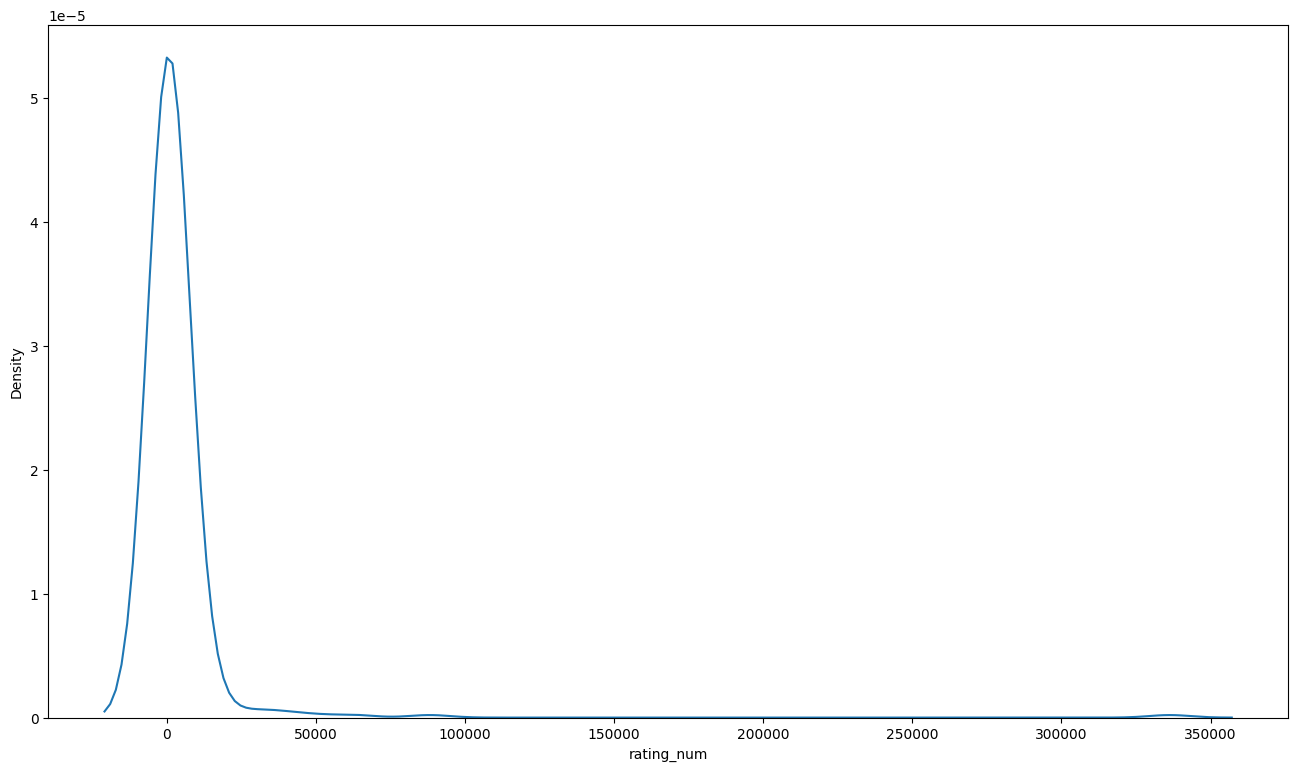

In [25]:
import seaborn as sns
from matplotlib import pyplot as plt

#
plt.figure(figsize=(16,9))
sns.kdeplot(products_df['rating_num'])
plt.show()

In [26]:
pd.set_option('display.max_rows', None)
group_data = products_df.groupby('brand').agg({'price($)':['mean'],'rating_num':['mean'],'mkt':['sum']})
temp_df = pd.DataFrame(columns=['brand','price','rating_num','mkt'])
temp_df['brand'] = group_data.index.tolist()
temp_df['price'] = group_data['price($)']['mean'].values
temp_df['rating_num'] = group_data['rating_num']['mean'].values
temp_df['mkt'] = group_data['mkt']['sum'].values

print('品牌定价排序')
temp_df.sort_values(by=['price'])

品牌定价排序


,brand,price,rating_num,mkt
72,Hair trends,0.390000,419.000000,163.41
40,Dolinvo,0.690000,32.000000,22.08
91,LANDOT,1.745000,3476.000000,12464.24
160,VKK,1.910000,58.000000,110.78
165,WOZUTUNT,2.050000,108.000000,221.40
102,MEGAWISE,2.377500,937.250000,10030.95
48,EVANYC,2.570000,18.000000,46.26
147,Shark,4.010000,1.000000,4.01
35,DAN Technology,4.280000,1383.000000,5919.24
141,SAOROPEB,4.500000,50.000000,225.00


In [27]:
print('品牌销量排序')
temp_df.sort_values(by=['rating_num'])

品牌销量排序


,brand,price,rating_num,mkt
135,RONGCHUANG,37.990000,0.000000,0.00
81,JNLY,96.000000,0.000000,0.00
68,Goderat,9.470000,0.000000,0.00
32,Cortex Professional,59.950000,0.000000,0.00
173,YOUSHEME,14.990000,0.000000,0.00
181,calista,109.000000,0.000000,0.00
183,ecojia,11.670000,0.000000,0.00
144,SHWORON,12.850000,0.000000,0.00
158,VENUS ALLURE,32.950000,0.000000,0.00
66,Generic,27.740000,0.000000,0.00


In [28]:
print('品牌市场规模排序')
temp_df.sort_values(by=['mkt'])

品牌市场规模排序


,brand,price,rating_num,mkt
66,Generic,27.740000,0.000000,0.00
183,ecojia,11.670000,0.000000,0.00
56,FOCALA,36.990000,0.000000,0.00
144,SHWORON,12.850000,0.000000,0.00
135,RONGCHUANG,37.990000,0.000000,0.00
32,Cortex Professional,59.950000,0.000000,0.00
68,Goderat,9.470000,0.000000,0.00
136,ROODTONG,6.990000,0.000000,0.00
176,YunYe,12.810000,0.000000,0.00
181,calista,109.000000,0.000000,0.00


In [29]:
products_df['is_prime'].value_counts()

0    193
1     90
Name: is_prime, dtype: int64

In [30]:
products_df.groupby('is_prime').agg({'price($)':['median'],'rating_num':['median'],'mkt':['sum'],'product_rating':['mean']})

,price($),rating_num,mkt,product_rating
,median,median,sum,mean
is_prime,,,,
0,39.99,118.0,36990682.31,4.251813
1,23.69,69.0,3076109.01,4.067778


In [31]:
import statsmodels.formula.api as smf

reg1 = smf.ols("product_rating~easy_use+time_consuming+portability+gift+protective", data=final_df).fit()
print(reg1.summary())


                            OLS Regression Results                            
Dep. Variable:         product_rating   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     4.603
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           0.000512
Time:                        04:53:19   Log-Likelihood:                -177.58
No. Observations:                 229   AIC:                             367.2
Df Residuals:                     223   BIC:                             387.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7506      0.099     37.

In [32]:
reg2 = smf.ols("gift~price+product_rating", data=final_df).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                   gift   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     7.593
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           0.000643
Time:                        04:53:27   Log-Likelihood:                 901.10
No. Observations:                 229   AIC:                            -1796.
Df Residuals:                     226   BIC:                            -1786.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0036      0.002     -1.